## EDA란?

- 목표를 갖고 데이터셋에 대하여 분석하고 이해해, 인공지능 학습에 용이하도록 정돈하는 과정
- 인공지능을 최적으로 학습시키기 위해 필수적이다. 

EDA 방식
- 데이터 분포 확인
- 연관성 검사
- 관련석 적은 feature 탈락
- 이상치 및 결측값 수정

## 1️⃣ Kaggle Dataset 다운받기

In [49]:
!pip install kaggle
print("-----------------------------------------------")
!pip show kaggle
print("-----------------------------------------------")
!kaggle config view


-----------------------------------------------
Name: kaggle
Version: 1.5.12
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: c:\users\sksoh\appdata\local\programs\python\python310\lib\site-packages
Requires: certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 
-----------------------------------------------
Configuration values from C:\Users\sksoh\.kaggle
- username: sooking87
- path: None
- proxy: None
- competition: None


In [50]:
# {"username":"sooking87","key":"15413b065a81186dc4dfe60f7a8c8b8a"}
!kaggle config view


Configuration values from C:\Users\sksoh\.kaggle
- username: sooking87
- path: None
- proxy: None
- competition: None


In [51]:
!kaggle datasets download -d CooperUnion/cardataset

cardataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

import zipfile

plt.style.use('seaborn')


In [54]:
directory = "C:/STUDY/방학(4)/Prometheus-ML/basic_wk6/"

data_zip = zipfile.ZipFile(directory + "cardataset.zip")
data_zip.extractall(directory)
data_zip.close()

data = pd.read_csv(directory + 'data.csv')

data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


해당 데이터셋에서 MSRP는 소비자 권장 가격을 의미하며, 이 값을 인공지능을 통해서 예측하고자 한다. 

이 데이터셋은 각종 차회사들의 제품들의 정보를 담고 있는 데이터셋으로 우리는 이것을 이용해서 **자동차의 정보가 입력** 되면 **가격을 예측** 하는 인공지능을 만들 것이다. 

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## 2️⃣ Checking for missing values

In [56]:
# 중복된 값들을 확인 및 제거
print("Number of duplicates: ", data.duplicated().sum())
data = data.drop_duplicates()


Number of duplicates:  715


In [57]:
# 결측값(NaN) 확인하기
print("Number of missing values(null): ", data.isnull().sum(), sep='\n')

Number of missing values(null): 
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


가장 많은 결측값을 가진 feature는 Market Category라는 것을 알 수 있다. 
그래서 Market Category가 정확히 어떤 자료인지를 살펴본다. 

In [58]:
market_category = data[['Make', 'Model', 'Market Category']]
market_category[:100:5]

,Make,Model,Market Category
0,BMW,1 Series M,"Factory Tuner,Luxury,High-Performance"
5,BMW,1 Series,"Luxury,Performance"
10,BMW,1 Series,"Luxury,High-Performance"
16,BMW,1 Series,"Luxury,High-Performance"
23,Audi,100,Luxury
30,Audi,100,Luxury
35,Mercedes-Benz,190-Class,Luxury
40,Mercedes-Benz,190-Class,Luxury
45,BMW,2 Series,Luxury
50,BMW,2 Series,"Factory Tuner,Luxury,High-Performance"


In [59]:
print(market_category['Market Category'].values.size)
print(market_category['Market Category'].values)
print(len(set(market_category['Market Category'].values)))


11199
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' ... 'Crossover,Hatchback,Luxury'
 'Crossover,Hatchback,Luxury' 'Luxury']
72


In [60]:
driven_wheels = data[['Driven_Wheels']]
print(driven_wheels)
print(driven_wheels['Driven_Wheels'].values.size)
print(len(set(driven_wheels['Driven_Wheels'].values)))

           Driven_Wheels
0       rear wheel drive
1       rear wheel drive
2       rear wheel drive
3       rear wheel drive
4       rear wheel drive
...                  ...
11909    all wheel drive
11910    all wheel drive
11911    all wheel drive
11912    all wheel drive
11913  front wheel drive

[11199 rows x 1 columns]
11199
4


다른 feature와 달리 Market Category는 NaN값도 많고 키워드의 종류도 많아 학습에 용이하지 않으므로 삭제한다. 

In [61]:
data.drop('Market Category', axis=1, inplace=True)


In [62]:
# NaN 값을 갖는 다른 feature들도 확인
null_data = data[data.isnull().any(axis=1)]
null_data


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


In [63]:
# HP_data: HP_data feature가 null값을 가진 데이터들
HP_data = null_data[null_data['Engine HP'].isnull()]
HP_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950


In [64]:
HP_data['Engine Fuel Type'].value_counts()


electric                            44
regular unleaded                    14
flex-fuel (unleaded/natural gas)     6
premium unleaded (recommended)       4
diesel                               1
Name: Engine Fuel Type, dtype: int64

In [65]:
data[data['Engine Fuel Type']=='electric'].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,82,85,617,41450


Engine Fuel Type이 electric인 경우에만 NaN 값을 가진 줄 알았는데 그건 아니였다. 

이러한 결측치들을 해소하기 위해 여러가지 방법이 사용된다. 

### 결측치 제거 방법

1. 완전 제거법: 학습 데이터 아예 제거

2. 단일 대체법: 데이터셋 내에서 일정한 과정을 통해 연산된 값으로 대체
    - 평균 대체: 간단하지만 해당 feature의 분산을 줄이고, 분석결과 편향이 생길 수 있다. 
    - 회귀 대체: 결측 샘플을 제외한 샘플들에게서 조건부 평균으로 결측을 대체한다. 평균 대체와 동일한 한계가 존재한다. 
    
3. 다중 대체법: 3단계로 구성되는 결측치 보강
    1. Imputation Phase: 가능한 대체 값의 분포에서 추출된 서로 다른 값으로 결측치를 처리한 M개의 새로운 데이터셋을 만든다.
    2. Analysis Phase: 만들어진 각각의 데이터셋에 대해서 분석을 수행한다.
    3. Pooling Phase: 분석을 통해 얻은 모수(원본을 대표하는 값)의 추정량과 표본오차를 통합해 하나의 분석결과를 제시한다.

결론적으로 다중대체법이 가장 진화된 방법이긴 하지만, 지나치게 복잡하기 때문에 기법이 존재함만을 알고 이번 실습에서는 완전 제거법을 사용한다. 

In [66]:
data.dropna(axis=0, how='any', inplace=True)
data.drop(data[data['Transmission Type'] == 'UNKNOWN'].index,
          axis='index', inplace=True)
print("Number of missing values(null): ", data.isnull().sum(), sep='\n')
print("Number of data : ", data.size)


Number of missing values(null): 
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64
Number of data :  166275


결측값에 대해서 처리를 해주었다.

## Handling Outliers

결측값 처리 이후, 이상치도 처리를 해주어야 한다. 

### 이상치란?

비정상적으로 극단적인 값을 가져 일반적인 범위를 벗어난 관측치로 정의한다. 

### 이상치의 기준

1. IQR을 이용하는 경우: BoxPlot
    IQR: 어떤 분포에서 분포의 상위 25% ~ 75% 구간의 크기
    이상치: 상위 75%값 - 1.5IQR 미만과 상위 25% + 1.5IQR 초과하는 값
2. 표준편차를 이용하는 경우
    데이터가 샘플의 양이 많아 정규분포와 유사한 분포를 가지면 표준화 과정을 거쳐 평균에서부터 표준편차 이상의 거리를 가진 샘플에 대해서 이상치라고 규정

실습에서는 1번의 방법으로 이상치를 처리할 예정

       Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
0      2011      335.0               6.0              2.0           26   
1      2011      300.0               6.0              2.0           28   
2      2011      300.0               6.0              2.0           28   
3      2011      230.0               6.0              2.0           28   
4      2011      230.0               6.0              2.0           28   
...     ...        ...               ...              ...          ...   
11909  2012      300.0               6.0              4.0           23   
11910  2012      300.0               6.0              4.0           23   
11911  2012      300.0               6.0              4.0           23   
11912  2013      300.0               6.0              4.0           23   
11913  2006      221.0               6.0              4.0           26   

       city mpg  Popularity   MSRP  
0            19        3916  46135  
1            19        3916  40650  


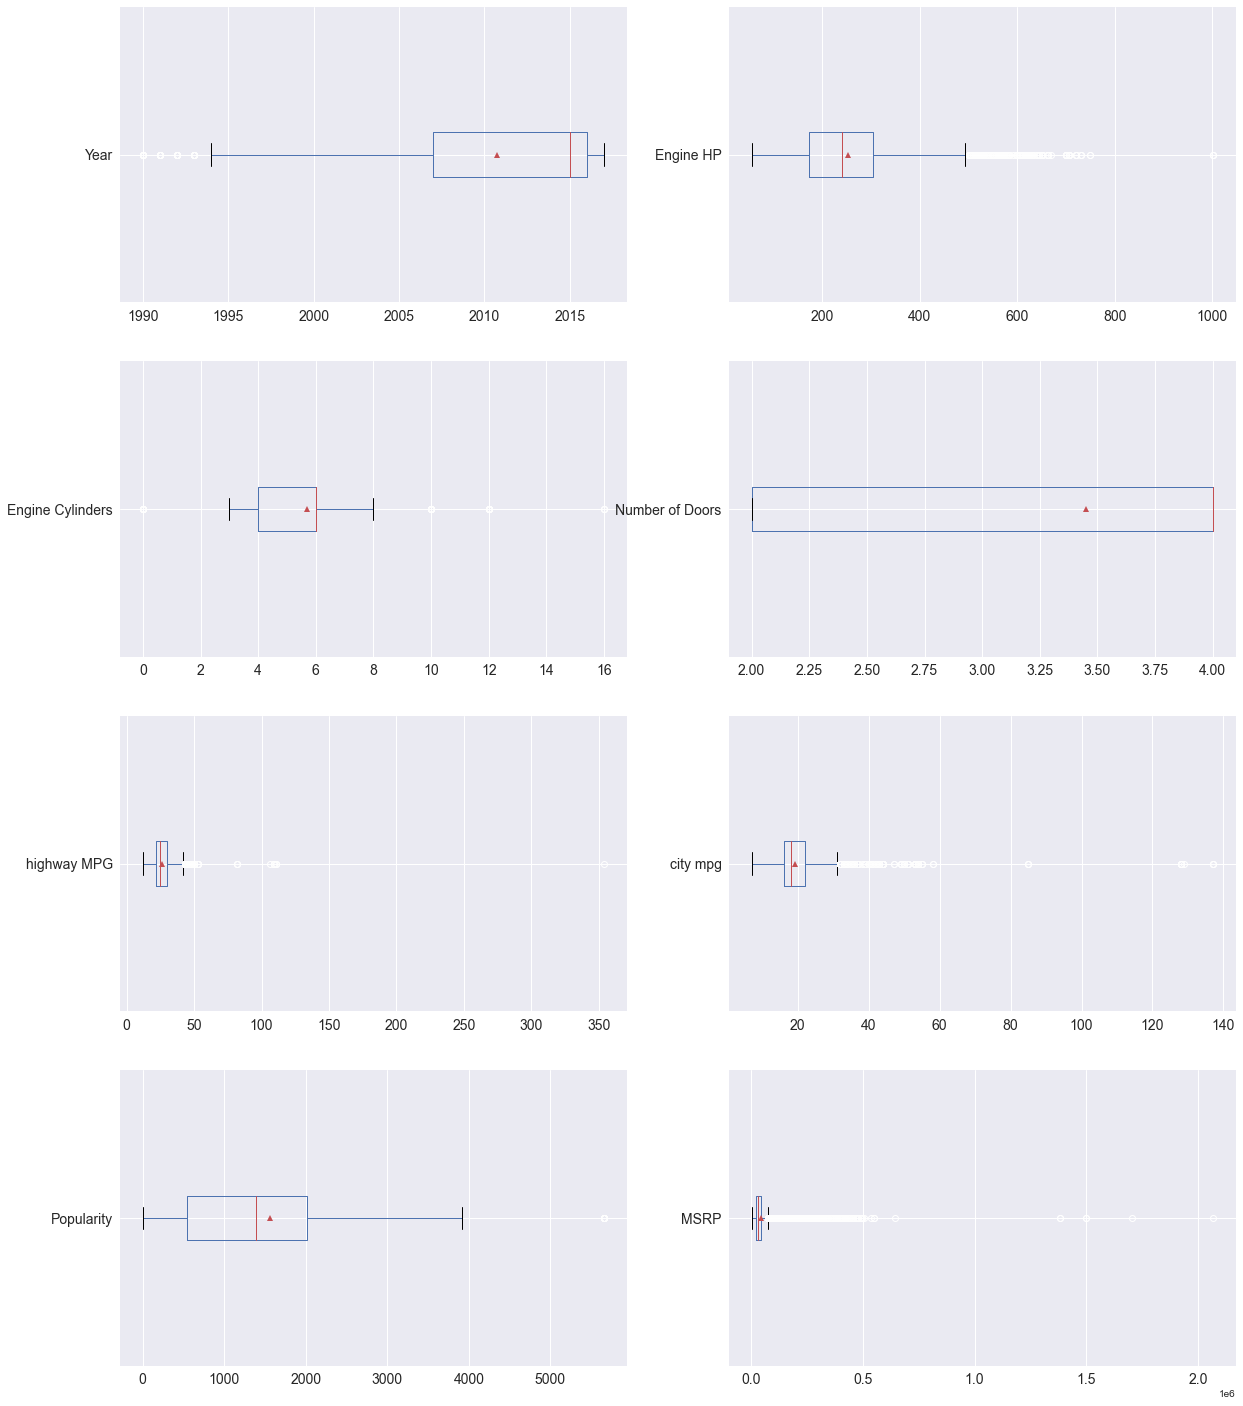

In [67]:
# numerical data extraction
num_col = data.select_dtypes(include=[np.number])
print(num_col)

# boxplot visualization
fig, ax = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(25)
fig.set_figwidth(20)
for index, key in enumerate(num_col):
    i, j = divmod(index, 2)
    data.boxplot(key, ax = ax[i, j], showmeans = True, vert = False, fontsize = 14)

위에 차트를 보게되면 Engine HP, MPG, MSRP에서 이상치가 많은 것을 확인할 수 있다. 

In [68]:
# Engine HP 에는 이상치의 값들이 전부 범위 이상으로 크다
# quantile -> 0.25, 0.75에 해당하는 값을 가져온다. 
HP_qt1 = data['Engine HP'].quantile(0.25)
HP_qt3 = data['Engine HP'].quantile(0.75)
HP_iqr = HP_qt3 - HP_qt1

higher = HP_qt3 + (1.5 * HP_iqr)

HP_data = data[data['Engine HP'] > higher]

HP_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
466,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774,257412
467,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,17,13,2774,233509
468,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,17,13,2774,233509
469,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Coupe,17,13,2774,288000
470,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774,257412


Engine HP가 이상치가 많아서 좀더 자세히 살펴보았더니 MSRP 역시 굉장히 높은 값을 가지고 있는 것을 확인할 수 있다. 

연관성 확인을 해본다. 

<AxesSubplot:xlabel='Engine HP', ylabel='MSRP'>

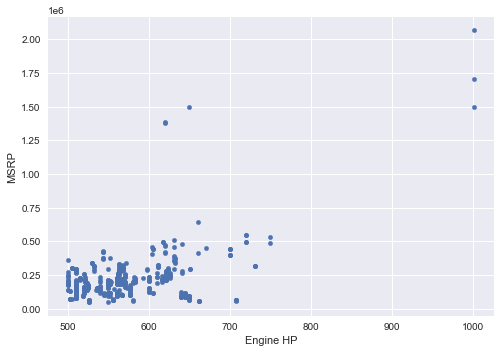

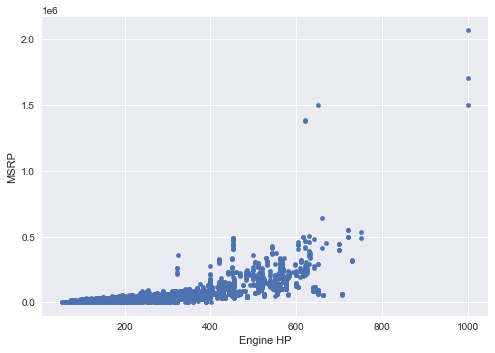

In [69]:
plt.style.use('seaborn')
HP_data.plot.scatter(x='Engine HP', y='MSRP')
data.plot.scatter(x='Engine HP', y='MSRP')


Engine HP의 이상치와 MSRP의 관계를 그렸을 때, 전체 데이터셋과 MSRP의 관계와 유사한 것을 통해서 어느 정도 연관성이 있다고 볼 수 있다. 
전체 데이터에서의 Engine HP와 MSRP(예측 결과값)의 관계와 Engine HP의 이상치와 MSRP의 관계가 유사하다는 것은 결국 이상치들이 중요한 비중을 차지하고 있다는 것이다. 

이상치를 다루는 데에 대해서 2가지 문제가 발생할 수 있다. 

1. 연관성이 있으므로 제거하지 않고 사용한다. <br>
    비정상적인 값으로 인해서 평균과 분산이 왜곡되는 등 큰 영향을 미칠 수 있다. 통계를 통해 학습하는 함수형 회귀분석의 경우 인공지능의 성능 자체에 영향을 끼칠 수 있다. 
    
2. 분석에 영향이 가므로 제거한다. <br>
    이상치 자체가 중요한 정보를 담고 있을 가능성이 있는데, 학습에 반영되지 않아서 예측 정확도가 줄어들 수 있다. 
    또한, 데이터 수집 과정에서 편향이 있었다면 이상치가 잘못 설정되었을 수 있다. 

하지만 간단한 실습을 하고 있는 것이기 때문에 이상치는 전부 제거한다. 

In [70]:
# 이상치 제거
drop_list = ['Engine HP', 'Engine Cylinders',
             'highway MPG', 'city mpg', 'MSRP']

for column in drop_list:
    qt1 = data[column].quantile(0.25)
    qt3 = data[column].quantile(0.75)
    iqr = qt3 - qt1
    lower = qt1 - (1.5*iqr)
    higher = qt3 + (1.5*iqr)
    min_index = data[data[column] < lower].index
    max_index = data[data[column] > higher].index
    data.drop(min_index, inplace=True)
    data.drop(max_index, inplace=True)

data


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


## Dropping irrelevant colums & Finding correlations

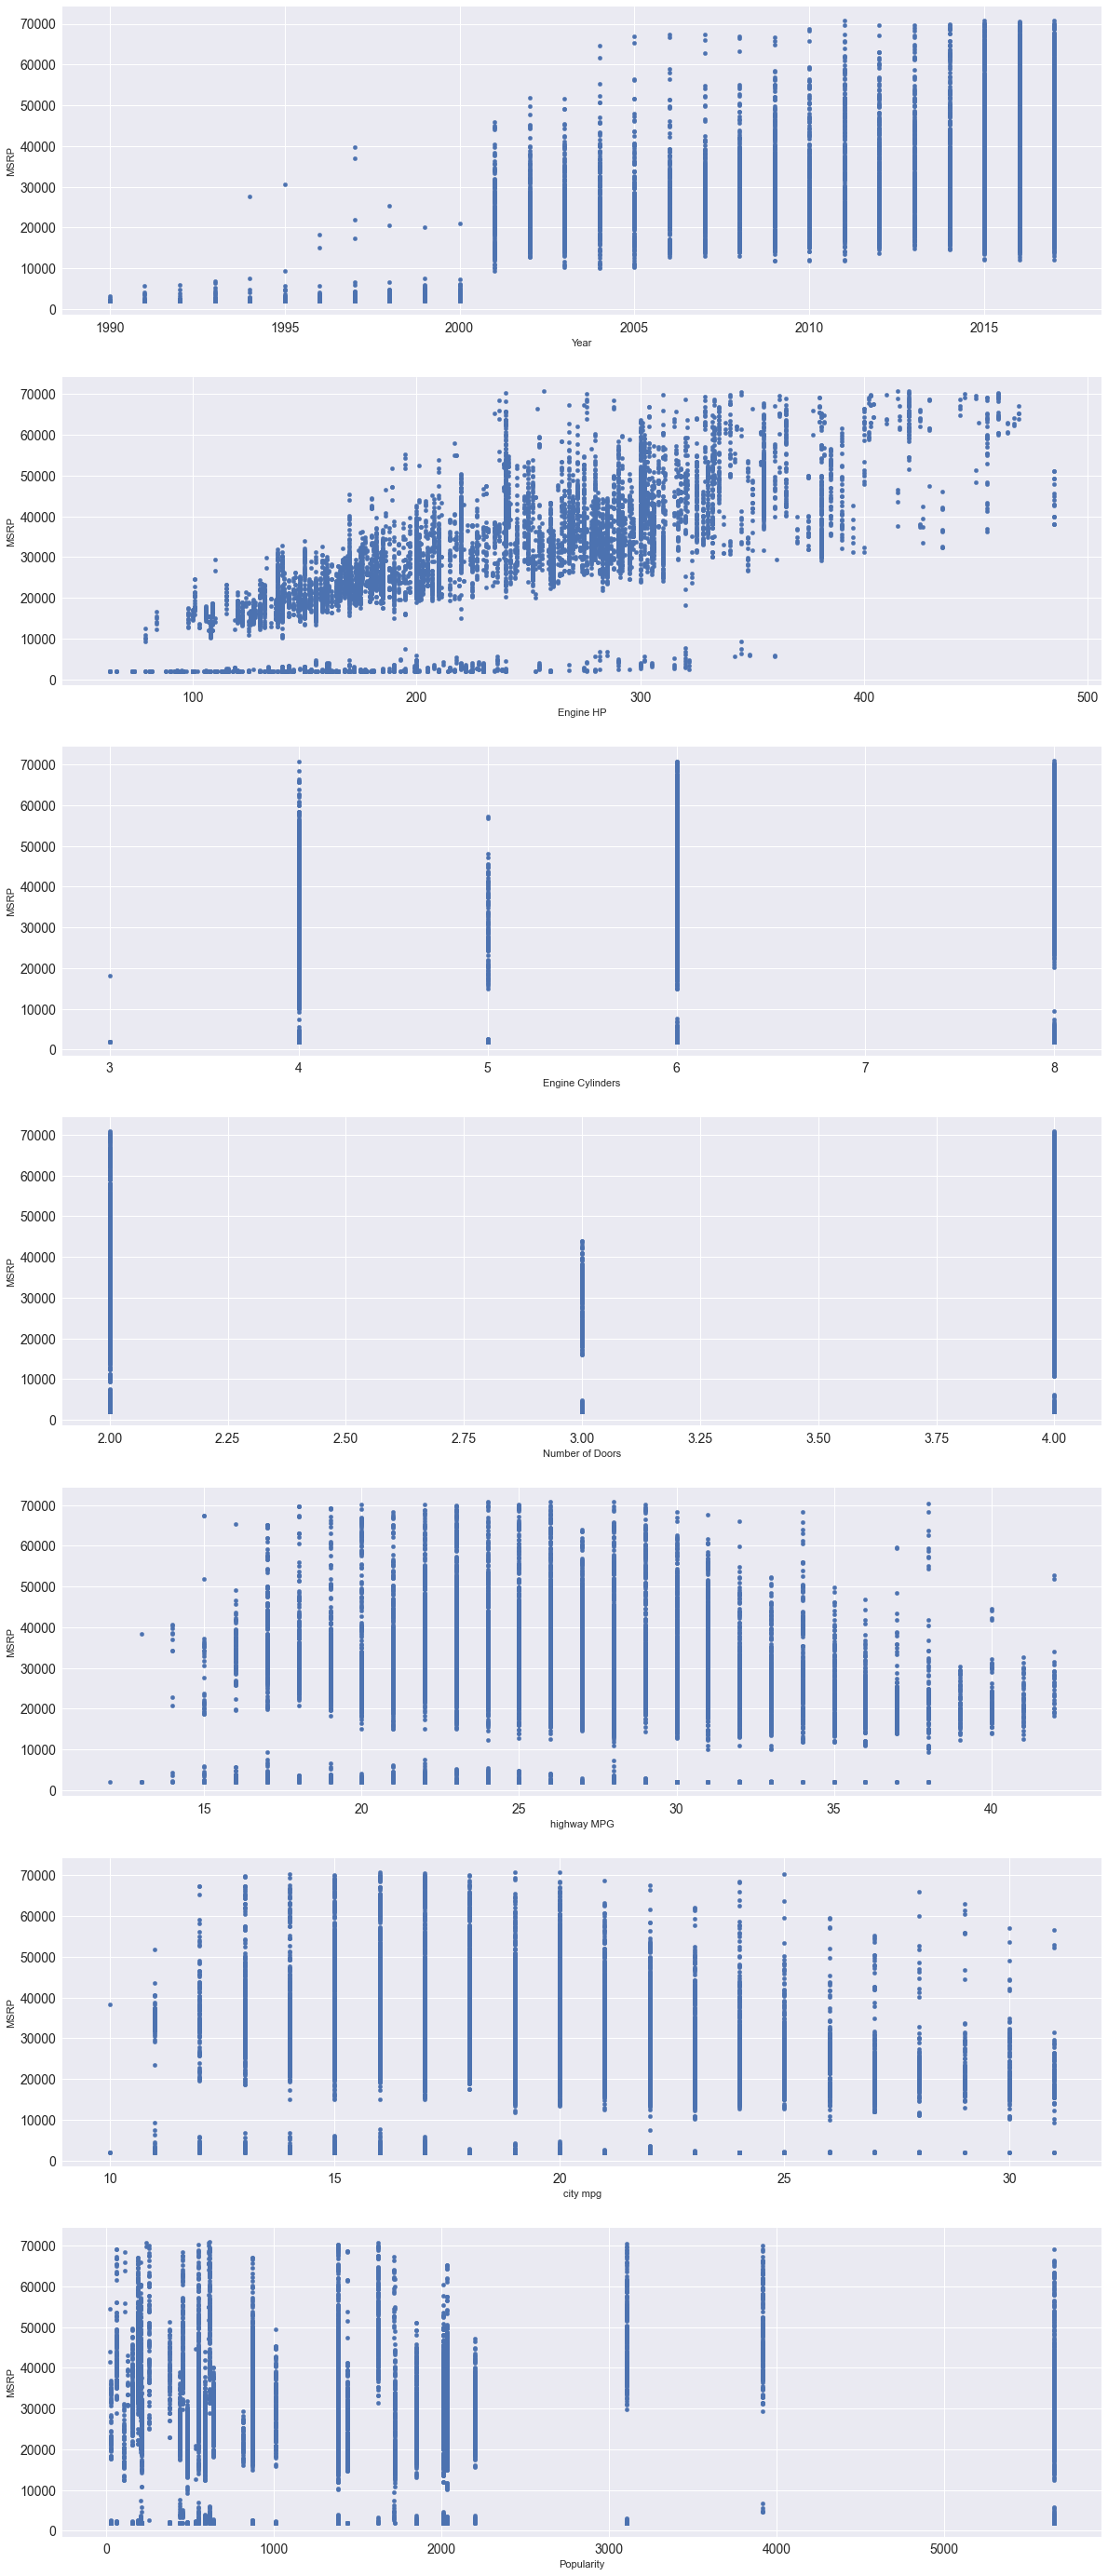

In [71]:
#numerical data extraction
num_col = data.select_dtypes(include=[np.number])
num_col.drop(labels='MSRP', axis=1, inplace=True)

#scatter visualization
fig, ax = plt.subplots(nrows=7, ncols=1)
fig.set_figheight(50)
fig.set_figwidth(20)
for index, key in enumerate(num_col.keys()):
    data.plot.scatter(x=key, y='MSRP', ax=ax[index], fontsize=14)


최근과 가까워질수록 가격이 올라갔다는 것을 알 수 있고, 2010년을 기점으로 가격이 크게 증가한 것을 알 수 있다. 

Engine HP 또한 증가할수록 가격이 상승한다는 것을 확인할 수 있다. 

차문의 개수가 3개이면 문의 개수가 2나 4일 때보다 가격이 낮을 확률이 높다. 

위 차트를 통해서 Year, Engine HP, Number of Doors가 가격과 연관성이 있다는 것을 확인할 수 있었다. 

다른 feature들의 영향력은 육안으로 쉽게 확인이 안되는데, 실제로도 가격과 연관성이 적은 것일까?

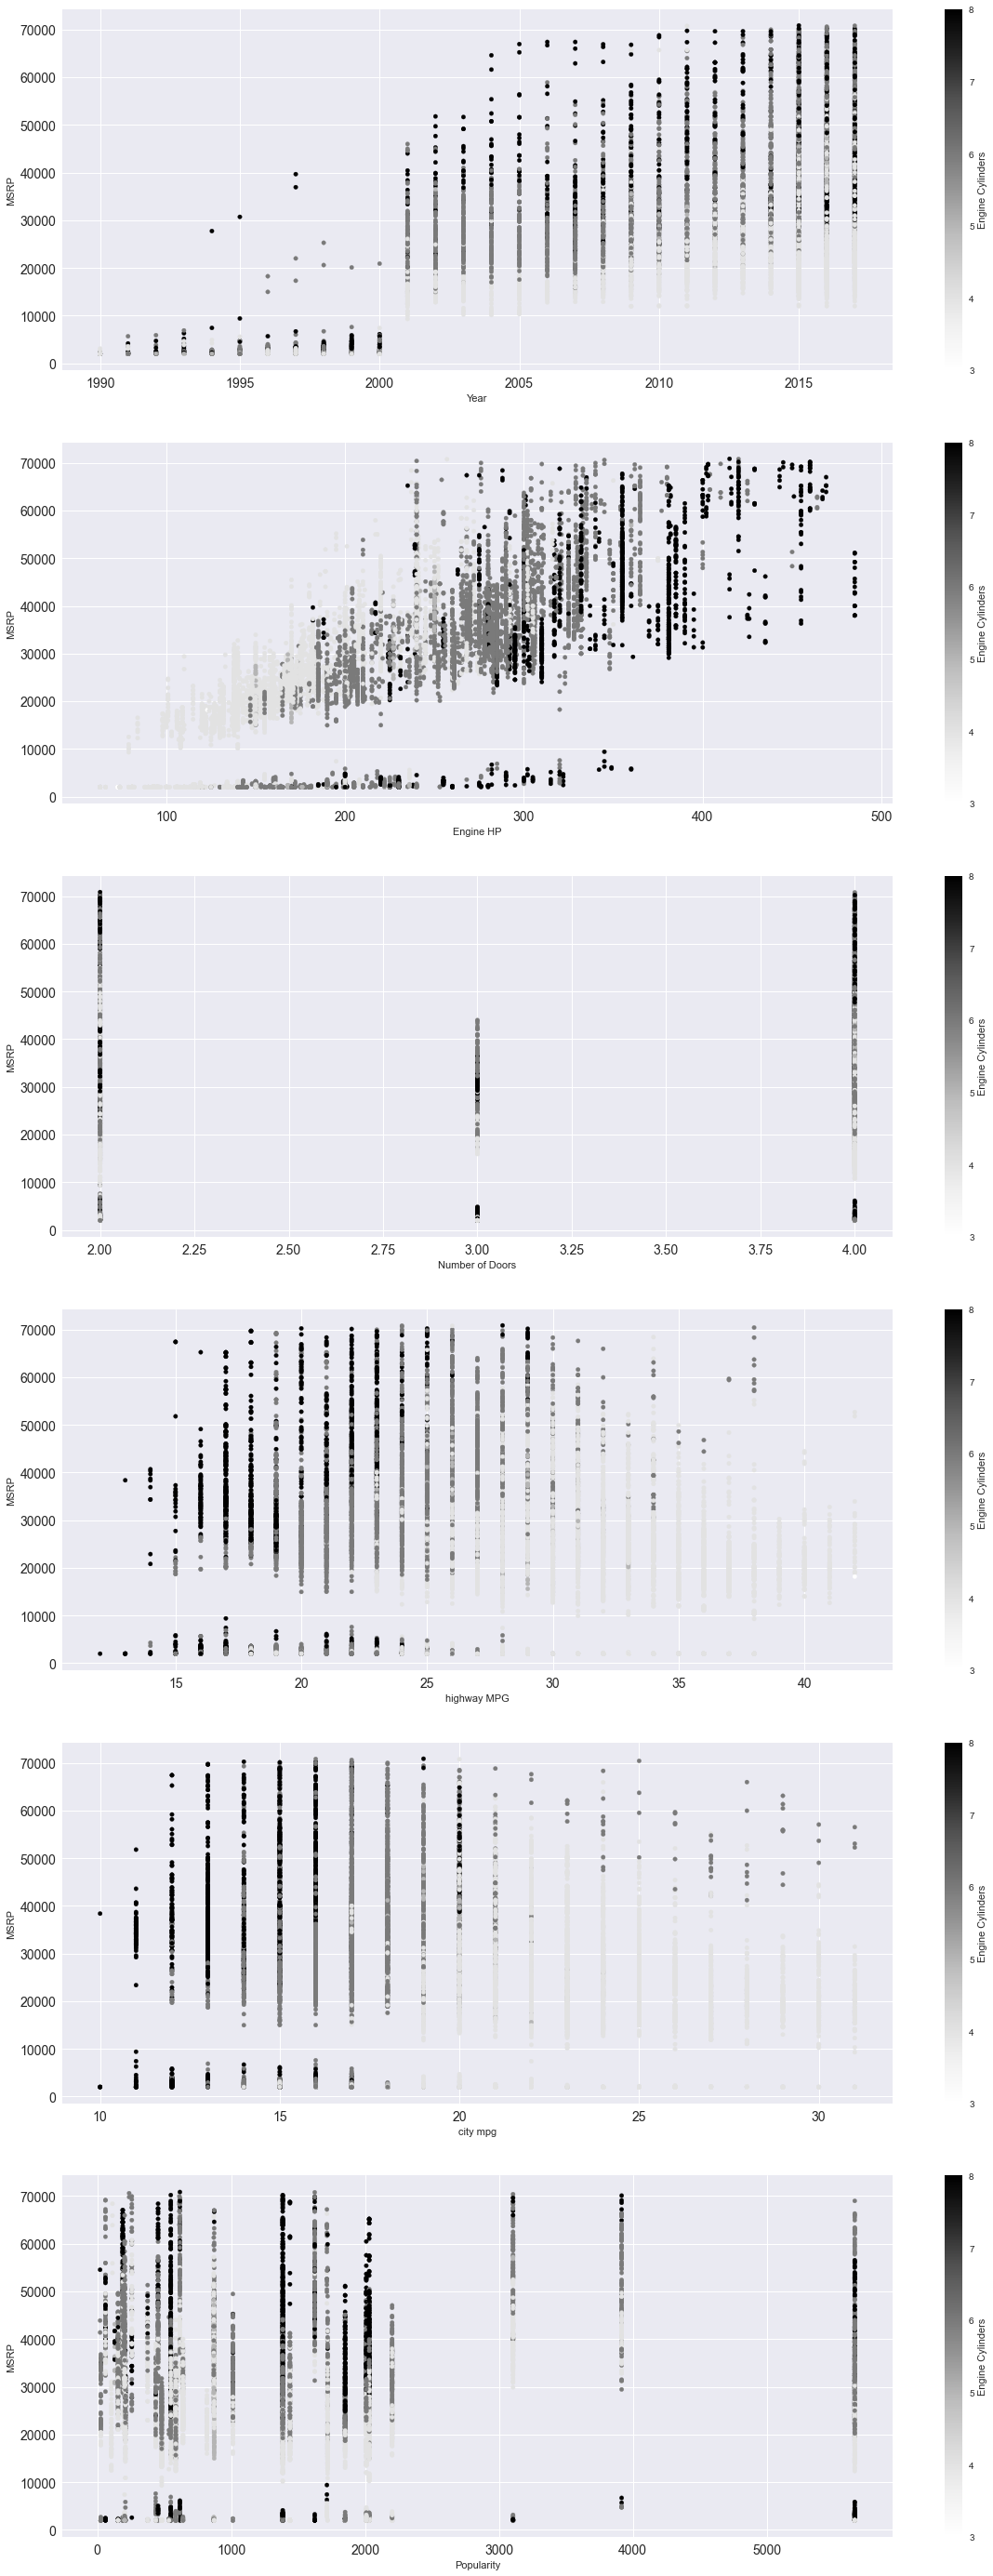

In [72]:
#numerical data extraction
num_col = data.select_dtypes(include=[np.number])
no_cy = num_col.drop(
    labels=['Engine Cylinders', 'MSRP'], axis=1, inplace=False)
#scatter visualization
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_figheight(50)
fig.set_figwidth(20)
for index, key in enumerate(no_cy.keys()):
    data.plot.scatter(x=key, y='MSRP', c='Engine Cylinders',
                      ax=ax[index], fontsize=14)


1. 엔진 마력이 높을 수록 실린더의 개수가 많아지고, 가격이 올라간다.
2. 연비는 실린더가 많을수록 나빠진다.
3. 인기가 같다면 실린더의 수(엔진 마력)가 많다면 가격이 높다.

이 세가지를 새롭게 알 수 있었다.

지금까지는 우리는 셀 수 있는 데이터에 대해서 통계를 하고 있었다. Categorical 데이터의 통계도 다루어 보자.

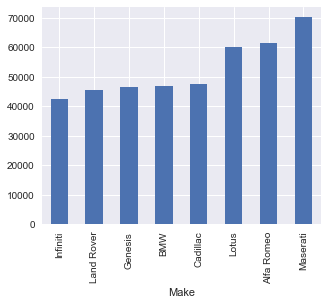

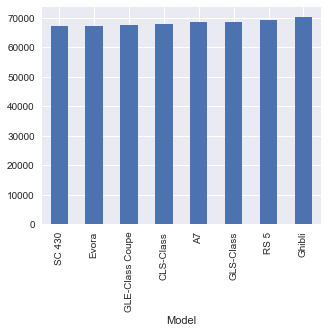

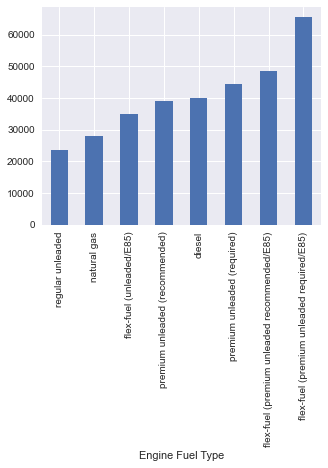

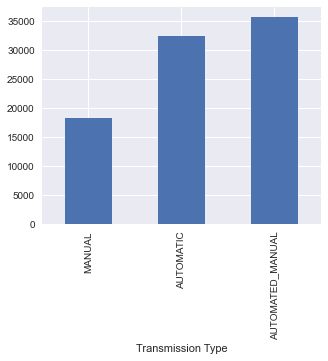

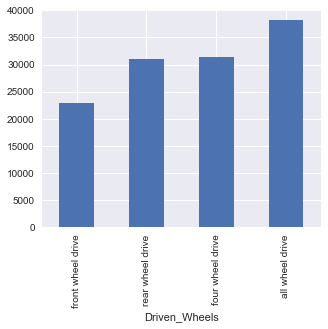

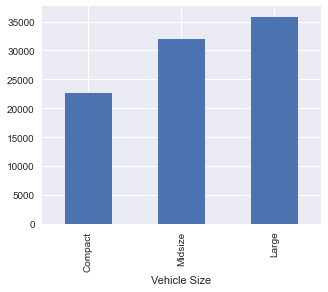

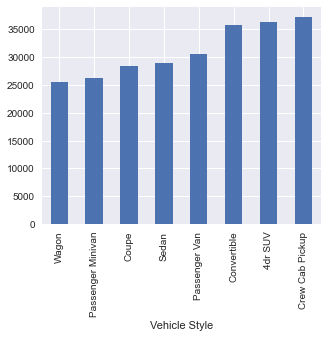

In [73]:
#categorical data extraction
cat_col = data.select_dtypes(exclude=[np.number])
#bar visualization
plt.rcParams['figure.figsize'] = (5, 4)
for index, key in enumerate(cat_col.keys()):
    i, j = divmod(index, 2)
    y = data.groupby(key)['MSRP'].mean()
    y = y.sort_values()[-8:]
    y.plot.bar(x=key, y='MSRP', fontsize=10)

    plt.show()


In [74]:
cat_col = data.select_dtypes(exclude=[np.number])

len(cat_col.keys())
len(data.select_dtypes(include=[np.number]).keys())


8

분석결과

1. 각 회사별로 제품 가격 차이가 존재한다.
2. 더 좋은 연료를 사용할 수록 가격이 높다.
3. 기어는 자동일 수록 가격이 높다. auto maual은 쉬프트가 달린것
4. 바퀴는 동력원이 많을 수록 가격이 높다.
5. 차체가 클수록 가격이 높다. <br>

이렇게 대략적인 EDA 종료

## Preprocessing

인공지능은 셀 수 없는 데이터(ex. 차종)는 이해하지 못하므로, 이를 Categorical Data로 변환하는 과정을 거쳐야 한다. 

In [75]:
cat_features = data.select_dtypes(exclude=[np.number]).keys()

cat_data = pd.get_dummies(data, columns=cat_features)
cat_data.shape


(9757, 821)

In [76]:
#Splitting datset into train and test

X = cat_data.drop('MSRP', axis=1)
y = cat_data['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,
                                                    random_state=42)
#startify를 안 한 이유: 특정 가격을 갖는 제품이 하나밖에 존재하지 않으면 오류가 발생


In [77]:
#Normalization
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Modeling

In [79]:
rfr = RandomForestRegressor(
    n_estimators=1000, max_leaf_nodes=700, random_state=42)

rfr.fit(X_train, y_train)


RandomForestRegressor(max_leaf_nodes=700, n_estimators=1000, random_state=42)

In [80]:
y_pred = rfr.predict(X_test)


print("MSE: ", mean_absolute_error(y_test, y_pred))


MSE:  2230.6104478390275


<AxesSubplot:xlabel='MSRP', ylabel='Predicted Value'>

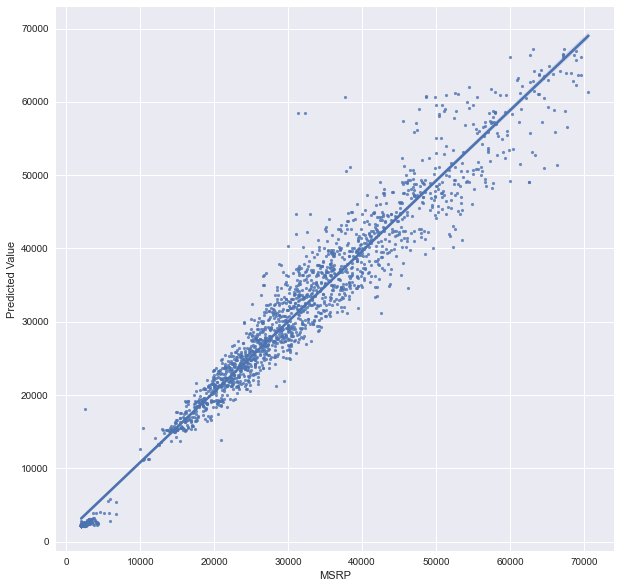

In [81]:
plt.figure(figsize=(10, 10))
plt.ylabel("Predicted Value")
sns.regplot(x=y_test, y=y_pred, fit_reg=True, scatter_kws={"s": 10})
